In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import boxcox
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [118]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [119]:
df.shape

(144867, 24)

In [120]:
df.size

3476808

In [121]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Let's Drop the columns "Unknown"

In [123]:
unknown = ['segment_factor', 'factor','cutoff_timestamp','cutoff_factor','is_cutoff']

In [124]:
df.drop(columns=unknown, inplace=True)

In [125]:
df.shape

(144867, 19)

In [126]:
df[:2]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590


### Unqiue Values of Data

In [127]:
df["data"].nunique() , df["data"].unique()

(2, array(['training', 'test'], dtype=object))

In [128]:
for i in df.columns:
    print(f"The unique elements in the columns are :: {i} ----->  {df[i].nunique()}")

The unique elements in the columns are :: data ----->  2
The unique elements in the columns are :: trip_creation_time ----->  14817
The unique elements in the columns are :: route_schedule_uuid ----->  1504
The unique elements in the columns are :: route_type ----->  2
The unique elements in the columns are :: trip_uuid ----->  14817
The unique elements in the columns are :: source_center ----->  1508
The unique elements in the columns are :: source_name ----->  1498
The unique elements in the columns are :: destination_center ----->  1481
The unique elements in the columns are :: destination_name ----->  1468
The unique elements in the columns are :: od_start_time ----->  26369
The unique elements in the columns are :: od_end_time ----->  26369
The unique elements in the columns are :: start_scan_to_end_scan ----->  1915
The unique elements in the columns are :: actual_distance_to_destination ----->  144515
The unique elements in the columns are :: actual_time ----->  3182
The unique 

In [129]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [131]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [132]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81


In [133]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [134]:
df[:1]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.43566,14.0,11.0,11.9653,14.0,11.0,11.9653


In [135]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

### Let's check for the Data start time and end time

In [136]:
df['trip_creation_time'].min(), df['trip_creation_time'].max() 

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-03 23:59:42.701692'))

In [137]:
df['od_start_time'].min() , df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

# Data Cleaning and Exploration

In [138]:
df[:2]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590


In [139]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [140]:
missing = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [141]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [142]:
df[['source_center','source_name']].isna().sum()

source_center      0
source_name      293
dtype: int64

In [143]:
df[df['source_name'].isna()][:5]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.149642,156.0,73.0,101.2556,28.0,14.0,20.7746
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.691981,212.0,92.0,127.9860,55.0,18.0,26.7304


# Let's check for source center value for which source name is null

In [144]:
df[(df["source_name"].notnull()) & (df["source_center"].isin(df[df["source_name"].isnull()]["source_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


In [145]:
df[['destination_name','destination_center']].isna().sum()

destination_name      261
destination_center      0
dtype: int64

# Let's check for the destination center value for which destination name is null

In [146]:
df[(df["destination_name"].notnull()) & (df["destination_center"].isin(df[df["destination_name"].isnull()]["destination_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


# We noted that from the describe the "segment_actual_time" is in negative, so the time cannot be in Negative, We Eliminate this

In [147]:
df[df['segment_actual_time'] < 0]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
1805,training,2018-09-14 18:24:50.326548,thanos::sroute:21a9cdbc-469e-40e7-8fda-f4c02a1...,Carting,trip-153694949570782725,IND000000ACT,Delhi_Gateway_HB (Delhi),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 18:24:50.326548,2018-09-14 20:15:39.709497,110.0,37.351560,12.0,44.0,45.8019,-26.0,14.0,12.9748
3761,training,2018-09-24 02:51:40.385840,thanos::sroute:f01c8bbd-655d-42ea-9abf-60d5040...,FTL,trip-153775750038541173,IND821115AAB,Sasaram_Central_I_2 (Bihar),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-24 18:46:18.352227,2018-09-25 06:36:06.594291,709.0,58.942962,12.0,48.0,68.8763,-21.0,30.0,43.6008
4040,test,2018-10-01 15:23:08.328308,thanos::sroute:749c5c42-2826-40c9-b0d3-5102cee...,Carting,trip-153840738832805377,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND110030AAD,Delhi_Kishangarh_DPC (Delhi),2018-10-01 15:23:08.328308,2018-10-01 18:21:13.740756,178.0,29.937006,29.0,38.0,38.4738,-5.0,11.0,12.4992
6329,training,2018-09-24 06:45:30.168184,thanos::sroute:b43ac2fc-3ec6-4a37-adf2-00b2561...,Carting,trip-153777153016792753,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND140603AAA,Zirakpur_DC (Punjab),2018-09-24 06:45:30.168184,2018-09-24 08:11:48.744751,86.0,27.144965,75.0,29.0,39.2543,-1.0,0.0,0.6070
39825,training,2018-09-23 22:33:30.538708,thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...,FTL,trip-153774201053841850,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-23 22:33:30.538708,2018-09-26 00:38:17.126605,3004.0,645.961735,1040.0,587.0,795.0999,-58.0,22.0,31.6575
40942,training,2018-09-24 01:49:00.396529,thanos::sroute:e3e7c92f-55a9-4ecb-a4a7-919bbb7...,Carting,trip-153775374039614677,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 01:49:00.396529,2018-09-24 07:52:00.002163,362.0,74.399774,152.0,94.0,117.7186,-211.0,9.0,8.0451
56464,training,2018-09-24 04:05:35.796451,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,FTL,trip-153776193579607660,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-24 04:05:35.796451,2018-09-25 07:20:32.805047,1634.0,56.662073,60.0,55.0,77.6657,-12.0,33.0,47.6248
58697,training,2018-09-24 19:41:53.611094,thanos::sroute:cf2e63a5-87d6-4e39-a2d6-5555ed6...,FTL,trip-153781811361072511,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-25 01:39:36.932699,2018-09-26 18:06:22.632559,2426.0,1211.462789,2070.0,1125.0,1514.2592,-36.0,19.0,26.9795
68205,test,2018-10-03 22:28:20.454881,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,FTL,trip-153860570045461434,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),2018-10-03 22:28:20.454881,2018-10-05 08:39:47.996375,2051.0,361.184689,608.0,329.0,464.8269,-1.0,46.0,66.0700
70479,training,2018-09-14 09:54:59.693367,thanos::sroute:3f5f6285-256d-48ea-9a07-ec85cfe...,FTL,trip-153691889969297161,IND328001AAA,Dholpur_GtRoad_D (Rajasthan),IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-09-14 19:01:17.394365,2018-09-14 20:32:27.216999,91.0,101.235370,28.0,113.0,121.1482,-42.0,63.0,68.6981


In [148]:
df.drop(df[df['segment_actual_time'] < 0].index, inplace=True)

In [149]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000
mean,961.226537,234.057171,416.908724,213.853002,284.750969,36.207427,18.507304,22.828528
std,1036.993595,344.974984,598.085058,307.997702,421.101831,53.561259,14.775870,17.860268
min,20.000000,9.000045,9.000000,6.000000,9.008200,0.000000,0.000000,0.000000
25%,161.000000,23.354927,51.000000,27.000000,29.909925,20.000000,11.000000,12.070100
50%,449.000000,66.126234,132.000000,64.000000,78.524600,29.000000,17.000000,23.513000
75%,1634.000000,286.706673,513.000000,257.000000,343.062075,40.000000,22.000000,27.812975
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


# Let's Visualise the Data with the help of the graphs and Analyse the Data

In [150]:
df['data'].unique()

['training', 'test']
Categories (2, object): ['test', 'training']

In [151]:
value = df['data'].value_counts()
value

training    104840
test         40006
Name: data, dtype: int64

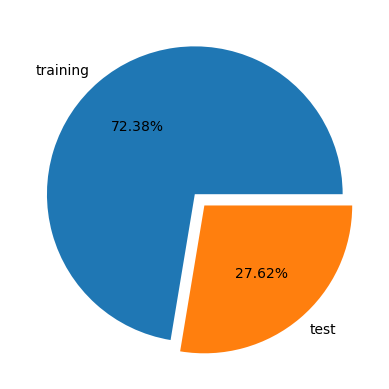

In [152]:
plt.pie(value, labels = ['training', 'test'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.show()

In [153]:
Route_type = df['route_type'].value_counts(normalize=False)
Route_type

FTL        99648
Carting    45198
Name: route_type, dtype: int64

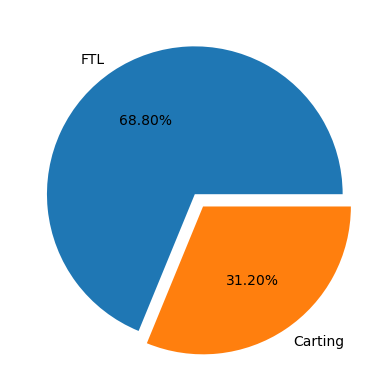

In [154]:
plt.pie(Route_type, labels = ['FTL', 'Carting'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.show()

# Let's Anlyse for the Univariate Analaysis

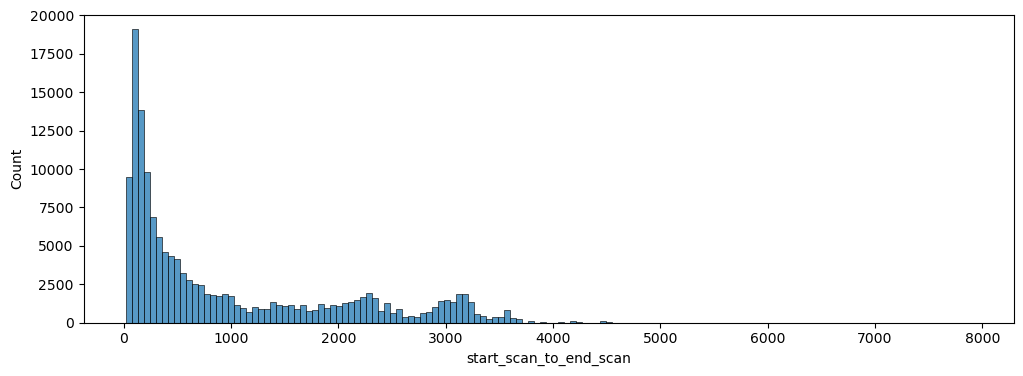

In [155]:
plt.figure(figsize=(12,4))
sns.histplot(df['start_scan_to_end_scan'])
plt.show()

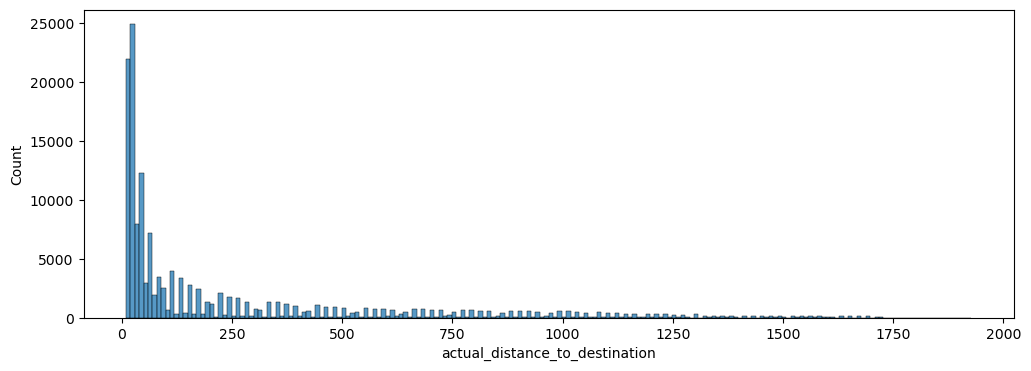

In [156]:
plt.figure(figsize=(12,4))
sns.histplot(df['actual_distance_to_destination'])
plt.show()

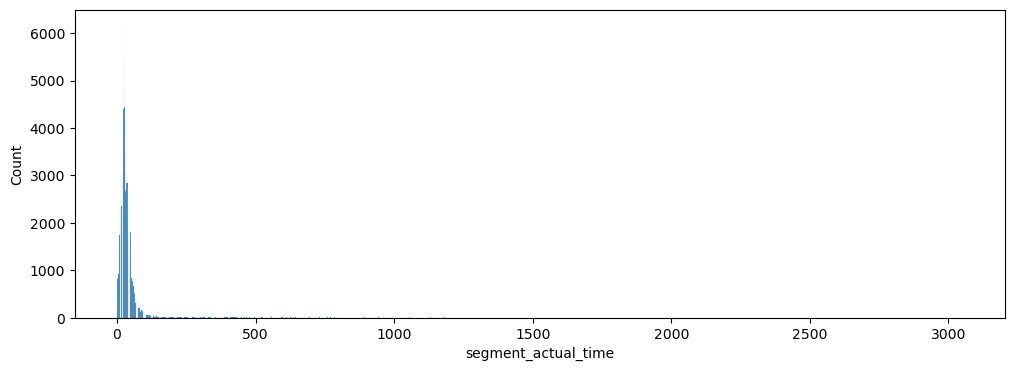

In [157]:
plt.figure(figsize=(12,4))
sns.histplot(df['segment_actual_time'])
plt.show()

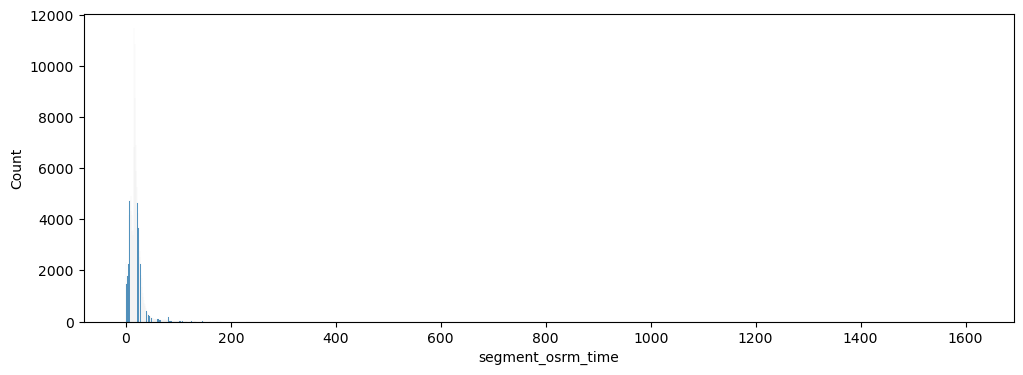

In [158]:
plt.figure(figsize=(12,4))
sns.histplot(df['segment_osrm_time'])
plt.show()

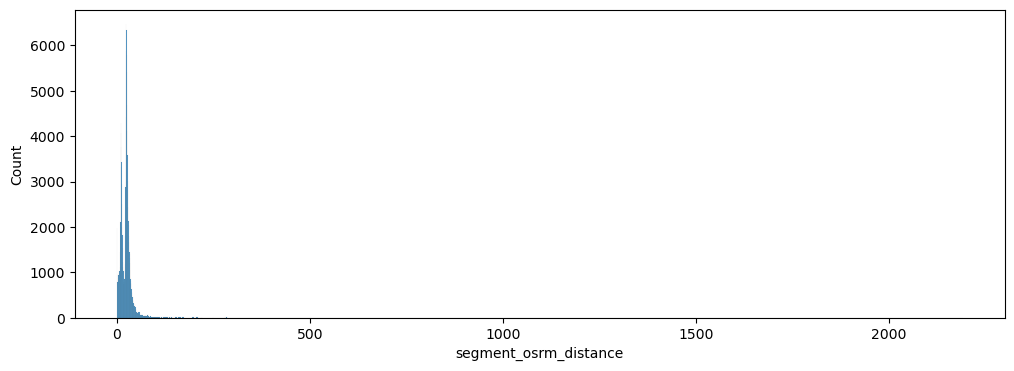

In [159]:
plt.figure(figsize=(12,4))
sns.histplot(df['segment_osrm_distance'])
plt.show()

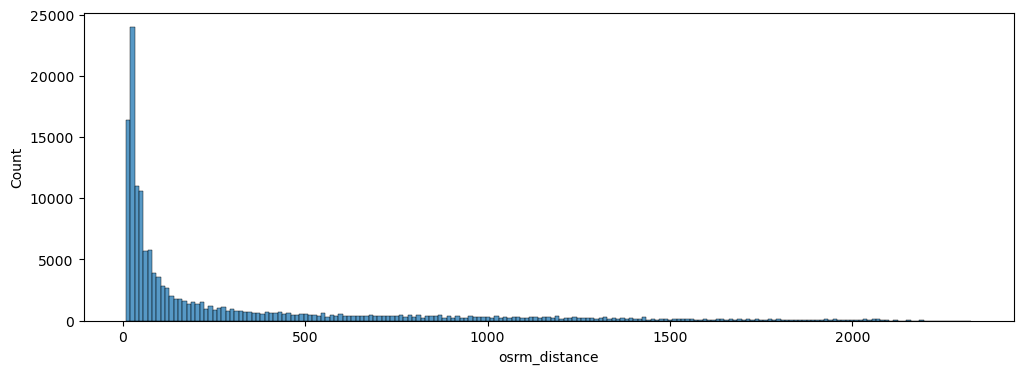

In [160]:
plt.figure(figsize=(12,4))
sns.histplot(df['osrm_distance'])
plt.show()

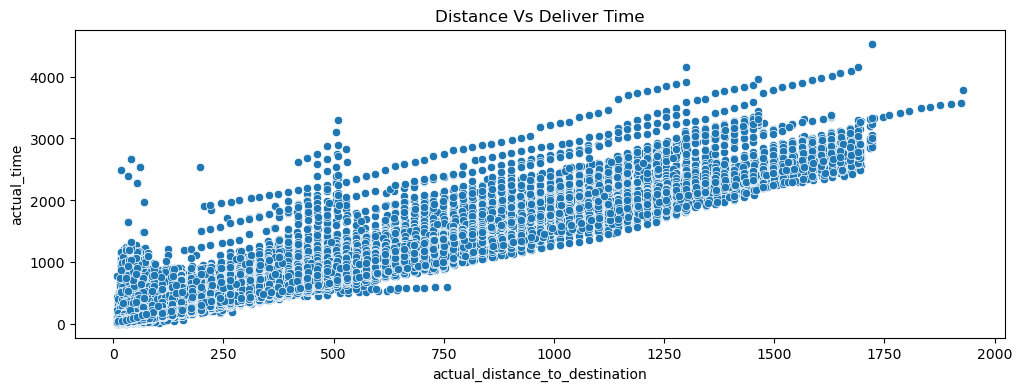

In [161]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="actual_distance_to_destination", y="actual_time")
plt.title("Distance Vs Deliver Time")
plt.show()

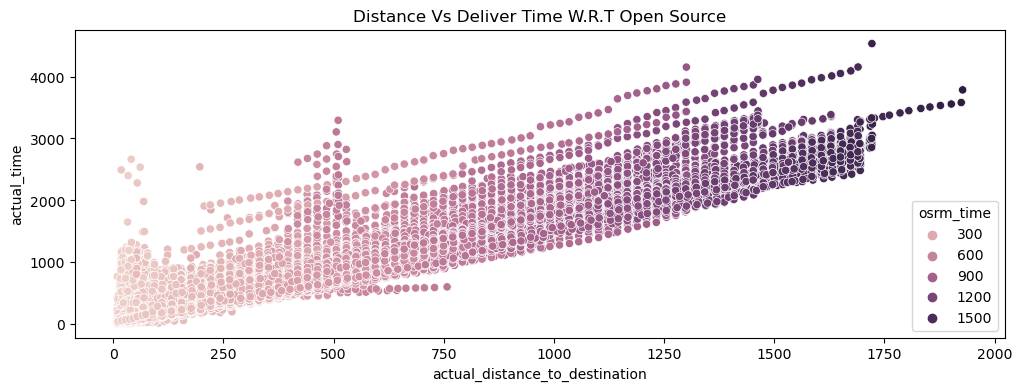

In [162]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="actual_distance_to_destination", y="actual_time", hue="osrm_time")
plt.title("Distance Vs Deliver Time W.R.T Open Source")
plt.show()

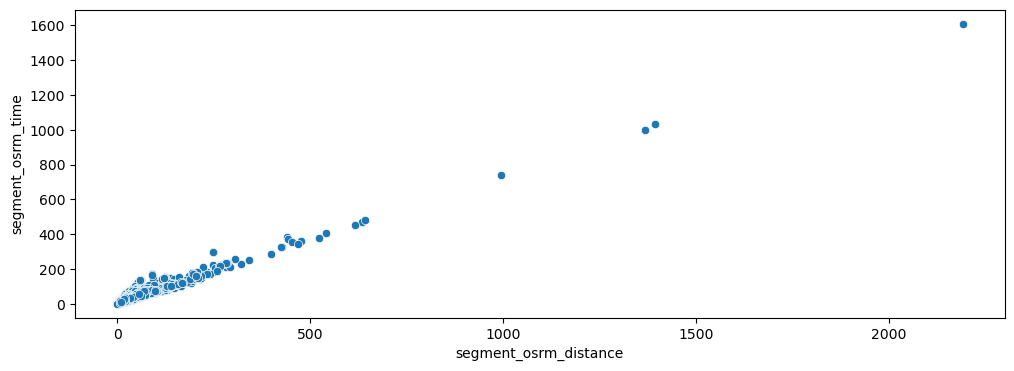

In [163]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="segment_osrm_distance", y="segment_osrm_time")
plt.show()

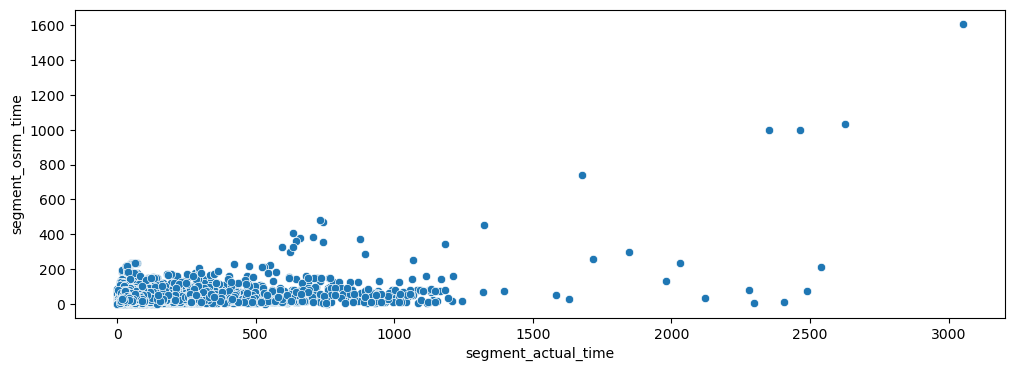

In [164]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="segment_actual_time", y="segment_osrm_time")
plt.show()

In [165]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_24136\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
start_scan_to_end_scan,1.000000,0.784988,0.785924,0.785283,0.784120,0.093372,0.219844,0.306972
actual_distance_to_destination,0.784988,1.000000,0.978658,0.995872,0.997148,0.045320,0.158836,0.232119
actual_time,0.785924,0.978658,1.000000,0.977996,0.979398,0.124483,0.171480,0.242296
osrm_time,0.785283,0.995872,0.977996,1.000000,0.999119,0.049977,0.177074,0.242288
osrm_distance,0.784120,0.997148,0.979398,0.999119,1.000000,0.048787,0.169157,0.239672
segment_actual_time,0.093372,0.045320,0.124483,0.049977,0.048787,1.000000,0.433604,0.449167
segment_osrm_time,0.219844,0.158836,0.171480,0.177074,0.169157,0.433604,1.000000,0.948520
segment_osrm_distance,0.306972,0.232119,0.242296,0.242288,0.239672,0.449167,0.948520,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_24136\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

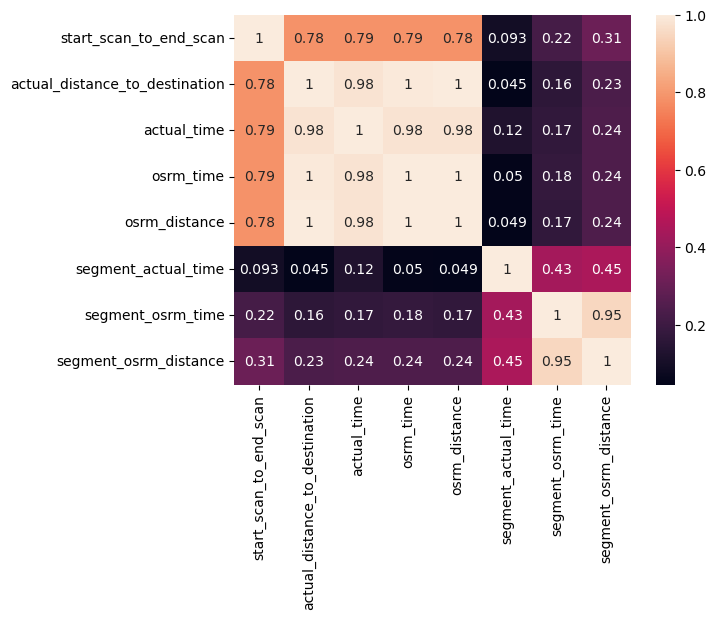

In [166]:
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

In [167]:
df['od_time_diff_hour'] = df['od_end_time'] - df['od_start_time']
df.drop(columns={'od_start_time','od_end_time'}, inplace=True)

In [168]:
df['od_time_diff_hour'] = df['od_time_diff_hour'].dt.total_seconds()/60
df['od_time_diff_hour']

0          86.213637
1          86.213637
2          86.213637
3          86.213637
4          86.213637
             ...    
144862    427.686364
144863    427.686364
144864    427.686364
144865    427.686364
144866    427.686364
Name: od_time_diff_hour, Length: 144846, dtype: float64

In [169]:
df['destination_city'] = df['destination_name'].str.split("_", expand= True)[0]

In [170]:
df['destination_city'].head()

0    Khambhat
1    Khambhat
2    Khambhat
3    Khambhat
4    Khambhat
Name: destination_city, dtype: object

In [171]:
df['destination_place'] = df['destination_name'].str.split("_", expand=True)[1]

In [172]:
df['destination_place'].head()

0    MotvdDPP
1    MotvdDPP
2    MotvdDPP
3    MotvdDPP
4    MotvdDPP
Name: destination_place, dtype: object

In [173]:
df['destination_state'] = df['destination_name'].str.split("_", expand=True)[2].str.split(" ", expand= True)[1]

In [174]:
df['destination_state'] = df['destination_state'].str.replace("(", "").str.replace(")", "")

C:\Users\HP\AppData\Local\Temp\ipykernel_24136\2165789120.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['destination_state'] = df['destination_state'].str.replace("(", "").str.replace(")", "")


In [175]:
df['destination_state']

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: destination_state, Length: 144846, dtype: object

In [176]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_year']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
144862    2018
144863    2018
144864    2018
144865    2018
144866    2018
Name: trip_year, Length: 144846, dtype: int64

In [177]:
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_month']

0         9
1         9
2         9
3         9
4         9
         ..
144862    9
144863    9
144864    9
144865    9
144866    9
Name: trip_month, Length: 144846, dtype: int64

In [178]:
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_day']

0         20
1         20
2         20
3         20
4         20
          ..
144862    20
144863    20
144864    20
144865    20
144866    20
Name: trip_day, Length: 144846, dtype: int64

In [464]:
df['source_state'] = df['source_name'].str.split("_", expand=True)[2].str.split(" ", expand=True)[1].str.replace("(","").str.replace(")","")

C:\Users\HP\AppData\Local\Temp\ipykernel_24136\726971721.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['source_state'] = df['source_name'].str.split("_", expand=True)[2].str.split(" ", expand=True)[1].str.replace("(","").str.replace(")","")


In [466]:
df['source_state']

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: source_state, Length: 144846, dtype: object

In [473]:
df['source_city'] =  df['source_name'].str.split("_", expand=True)[0]

In [474]:
df['source_city'].head()

0    Anand
1    Anand
2    Anand
3    Anand
4    Anand
Name: source_city, dtype: object

In [481]:
df['source_place'] = df['source_name'].str.split("_", expand =True)[1]

In [482]:
df['source_place'].head()

0    VUNagar
1    VUNagar
2    VUNagar
3    VUNagar
4    VUNagar
Name: source_place, dtype: object

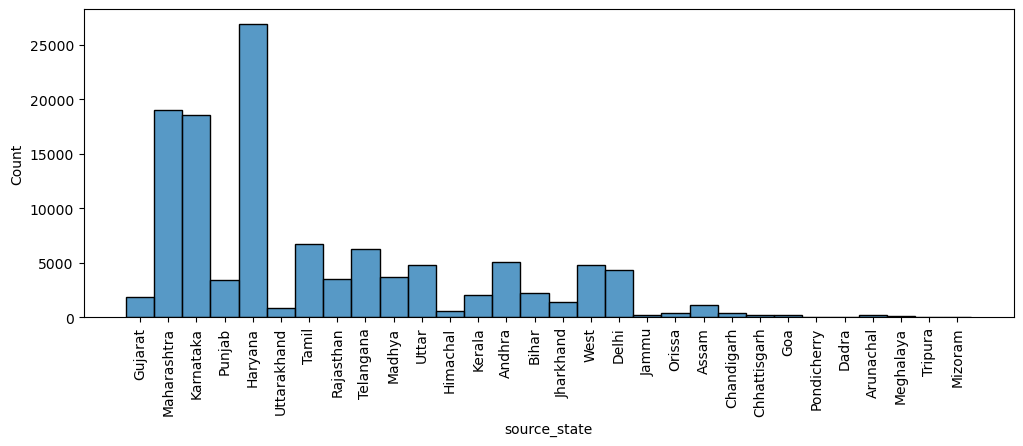

In [503]:
plt.figure(figsize=(12,4))
sns.histplot(df['source_state'])
plt.xticks(rotation = 90)
plt.show()

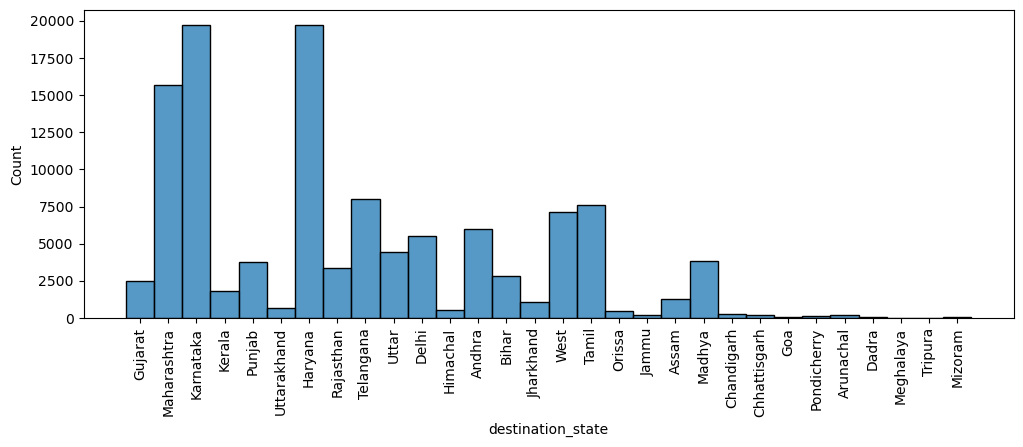

In [179]:
plt.figure(figsize=(12,4))
sns.histplot(df['destination_state'])
plt.xticks(rotation = 90)
plt.show()

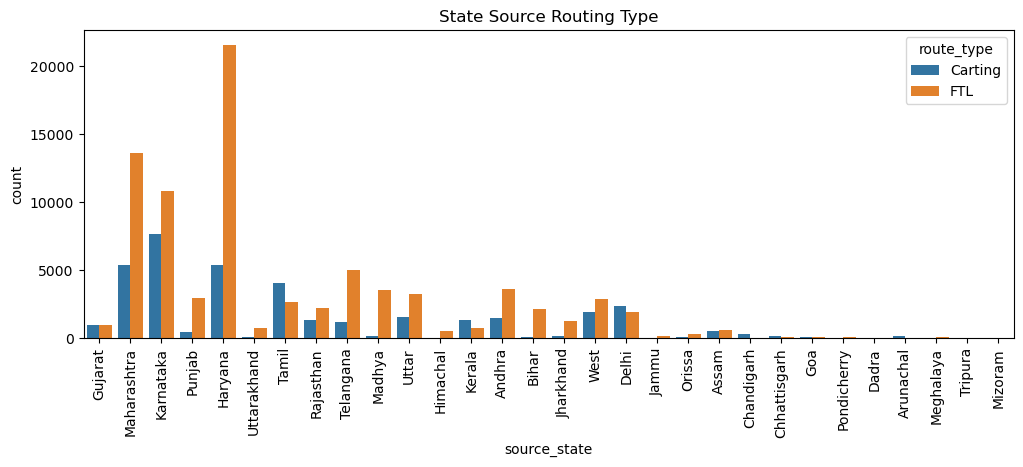

In [504]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x = df['source_state'], hue='route_type')
plt.xticks(rotation = 90)
plt.title("State Source Routing Type")
plt.show()

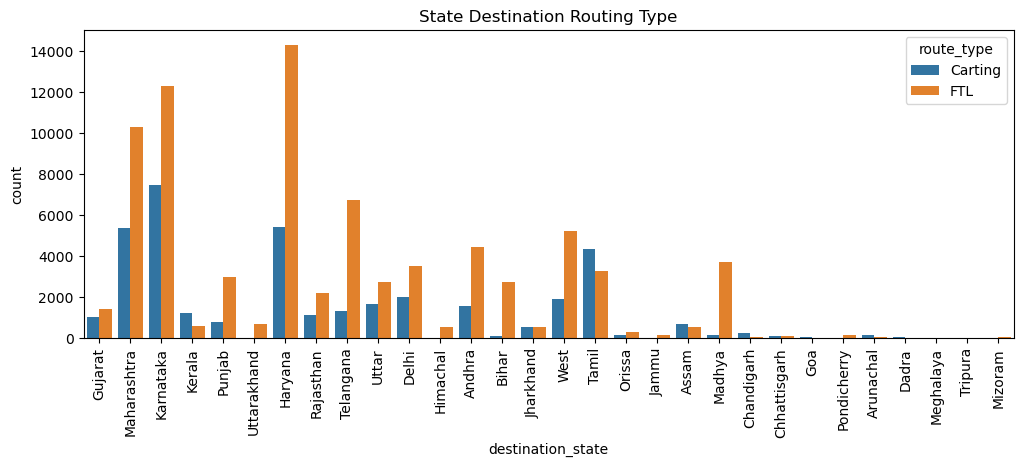

In [505]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x = df['destination_state'], hue='route_type')
plt.xticks(rotation = 90)
plt.title("State Destination Routing Type")
plt.show()

In [181]:
df['trip_hour'] = df['trip_creation_time'].dt.hour

In [182]:
hour_trips = df.groupby(by='trip_hour')['trip_uuid'].count().reset_index()
hour_trips.head()

,trip_hour,trip_uuid
0,0,8299
1,1,8768
2,2,7320
3,3,4975
4,4,6637


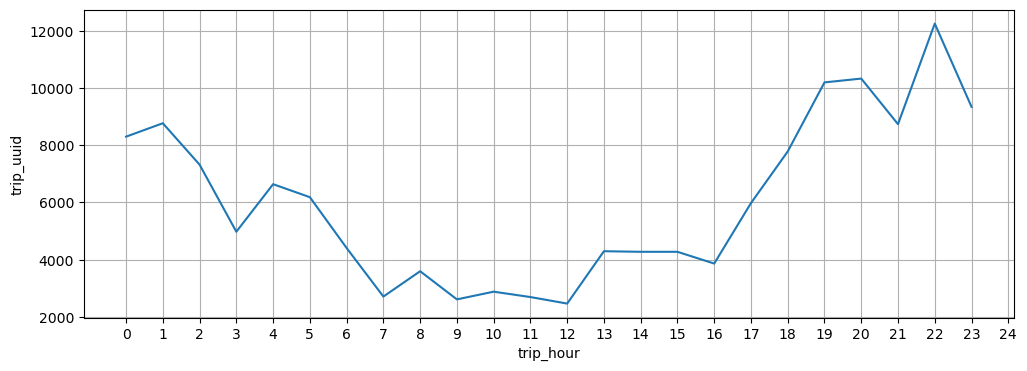

In [183]:
plt.figure(figsize=(12,4))
sns.lineplot(data=hour_trips, x='trip_hour', y="trip_uuid")
plt.grid('both')
plt.xticks(np.arange(0,25))
plt.show()

In [184]:
df['route_schedule'] = df['route_schedule_uuid'].str.split(":", expand=True)[0]

In [185]:
df['route_schedule']

0         thanos
1         thanos
2         thanos
3         thanos
4         thanos
           ...  
144862    thanos
144863    thanos
144864    thanos
144865    thanos
144866    thanos
Name: route_schedule, Length: 144846, dtype: object

In [447]:
df[:2]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_osrm_distance,od_time_diff_hour,destination_city,destination_place,destination_state,trip_year,trip_month,trip_day,trip_hour,route_schedule
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,11.9653,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,9.7590,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos


In [446]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
start_scan_to_end_scan              1915
actual_distance_to_destination    144494
actual_time                         3182
osrm_time                           1531
osrm_distance                     138026
segment_actual_time                  729
segment_osrm_time                    214
segment_osrm_distance             113782
od_time_diff_hour                  26369
destination_city                    1258
destination_place                   1154
destination_state                     30
trip_year                              1
trip_month                             2
trip_day                              22
trip_hour       

In [485]:
df['source_state'].value_counts()

Haryana         26935
Maharashtra     18993
Karnataka       18531
Tamil            6697
Telangana        6212
Andhra           5087
Uttar            4791
West             4742
Delhi            4317
Madhya           3687
Rajasthan        3529
Punjab           3380
Bihar            2206
Kerala           2038
Gujarat          1867
Jharkhand        1343
Assam            1126
Uttarakhand       827
Himachal          532
Orissa            404
Chandigarh        367
Chhattisgarh      229
Jammu             182
Goa               165
Arunachal         150
Meghalaya          77
Pondicherry        49
Dadra              30
Mizoram            26
Tripura             5
Name: source_state, dtype: int64

In [487]:
df['destination_state'].value_counts()

Karnataka       19750
Haryana         19744
Maharashtra     15682
Telangana        8032
Tamil            7610
West             7110
Andhra           5984
Delhi            5490
Uttar            4413
Madhya           3852
Punjab           3751
Rajasthan        3335
Bihar            2809
Gujarat          2456
Kerala           1834
Assam            1249
Jharkhand        1076
Uttarakhand       666
Himachal          543
Orissa            453
Chandigarh        282
Chhattisgarh      221
Arunachal         185
Jammu             167
Pondicherry       154
Goa                74
Dadra              34
Mizoram            31
Tripura             9
Meghalaya           8
Name: destination_state, dtype: int64

In [490]:
df['source_name'].value_counts()[:5]

Gurgaon_Bilaspur_HB (Haryana)        23342
Bangalore_Nelmngla_H (Karnataka)      9972
Bhiwandi_Mankoli_HB (Maharashtra)     9085
Pune_Tathawde_H (Maharashtra)         4061
Hyderabad_Shamshbd_H (Telangana)      3340
Name: source_name, dtype: int64

In [491]:
df['destination_name'].value_counts()[:5]

Gurgaon_Bilaspur_HB (Haryana)        15189
Bangalore_Nelmngla_H (Karnataka)     11016
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5141
Kolkata_Dankuni_HB (West Bengal)      4891
Name: destination_name, dtype: int64

In [493]:
df["source_destination"]=df["source_name"] + df["destination_name"]

In [494]:
df['source_destination'][:4]

0    Anand_VUNagar_DC (Gujarat)Khambhat_MotvdDPP_D ...
1    Anand_VUNagar_DC (Gujarat)Khambhat_MotvdDPP_D ...
2    Anand_VUNagar_DC (Gujarat)Khambhat_MotvdDPP_D ...
3    Anand_VUNagar_DC (Gujarat)Khambhat_MotvdDPP_D ...
Name: source_destination, dtype: object

# Bussiest Corridor

In [502]:
df['source_destination'].value_counts()[:5]

Gurgaon_Bilaspur_HB (Haryana)Bangalore_Nelmngla_H (Karnataka)     4975
Bangalore_Nelmngla_H (Karnataka)Gurgaon_Bilaspur_HB (Haryana)     3316
Gurgaon_Bilaspur_HB (Haryana)Kolkata_Dankuni_HB (West Bengal)     2862
Gurgaon_Bilaspur_HB (Haryana)Hyderabad_Shamshbd_H (Telangana)     1638
Gurgaon_Bilaspur_HB (Haryana)Bhiwandi_Mankoli_HB (Maharashtra)    1617
Name: source_destination, dtype: int64

# Least Bussiest Corridor

In [501]:
df['source_destination'].value_counts(ascending=True)[:5]

Malerkotla_DC (Punjab)Dhuri_DMComDPP_D (Punjab)                          1
Daurala_Sardhnrd_D (Uttar Pradesh)Khatauli_TilakNgr_D (Uttar Pradesh)    1
Salem_Kadtmpty_H (Tamil Nadu)Salem_Kadtmpty_D (Tamil Nadu)               1
Kayamkulam_Bhrnikvu_D (Kerala)Manthuka_Central_D_1 (Kerala)              1
Mumbai_East_I_21 (Maharashtra)Mumbai_Kalyan (Maharashtra)                1
Name: source_destination, dtype: int64

# Average Distance between Bussiest Corridor

In [511]:
df[df['source_destination'] == "Gurgaon_Bilaspur_HB (Haryana)Bangalore_Nelmngla_H (Karnataka)"]['actual_distance_to_destination'].mean()

859.7926156621767

# Average Distance between Least Bussiest Corridor

In [516]:
df[df['source_destination'] == "Malerkotla_DC (Punjab)Dhuri_DMComDPP_D (Punjab)"]["actual_distance_to_destination"].mean()

17.100289404993177

# Average Time Between the Bussiest Corridor

In [517]:
df[df['source_destination'] == "Gurgaon_Bilaspur_HB (Haryana)Bangalore_Nelmngla_H (Karnataka)"]['actual_time'].mean()

1367.1736683417084

# Average Time Between the Least Bussiest Corridor

In [518]:
df[df['source_destination'] == "Malerkotla_DC (Punjab)Dhuri_DMComDPP_D (Punjab)"]["actual_time"].mean()

36.0

# Data Wrangling

# Grouping by segment || In- Depth Analysis
a. Create a unique identiﬁer for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.

In [186]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_osrm_distance,od_time_diff_hour,destination_city,destination_place,destination_state,trip_year,trip_month,trip_day,trip_hour,route_schedule
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,11.9653,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,9.7590,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.8152,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,13.0224,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,3.9153,86.213637,Khambhat,MotvdDPP,Gujarat,2018,9,20,2,thanos


In [187]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'od_time_diff_hour', 'destination_city',
       'destination_place', 'destination_state', 'trip_year', 'trip_month',
       'trip_day', 'trip_hour', 'route_schedule'],
      dtype='object')

In [188]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                        'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'
                                                        })

In [189]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})

In [190]:
df2.shape

(14817, 15)

In [191]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.951610,556.320988,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.921172,314.485624,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.164000,416.547252,9.072900,32.654500,70.154400,218.710200,3523.632400


In [192]:
df2.isna().sum()

trip_uuid                          0
source_center                      0
destination_center                 0
data                               0
route_type                         0
trip_creation_time                 0
source_name                       10
destination_name                   8
start_scan_to_end_scan             0
actual_distance_to_destination     0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_24136\1738403036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

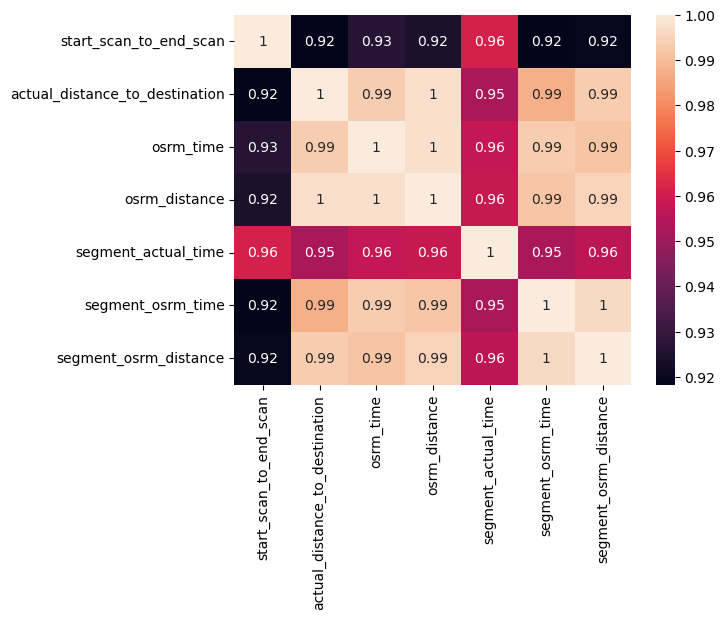

In [193]:
sns.heatmap(df2.corr(), annot=True)

In [194]:
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,117.0,146.7918,340.0,115.0,146.7919


# Detecting Outliers for the Numerical Columns

In [195]:
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                    'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

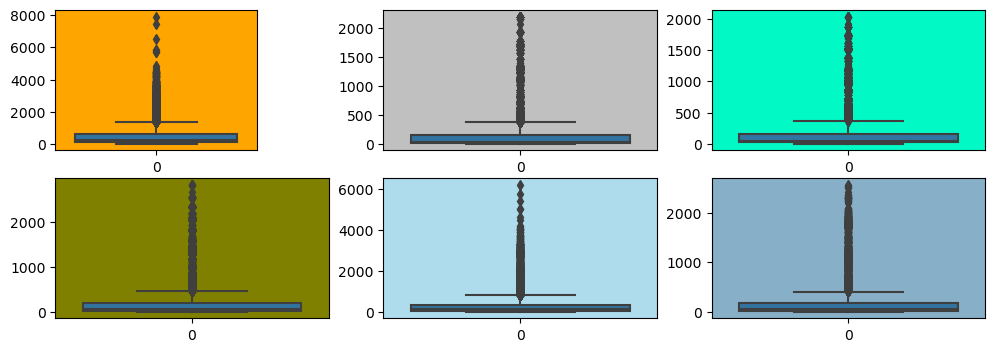

In [196]:
plt.figure(figsize=(12,4))
plt.subplot(2,4,1)
sns.boxplot(df2['start_scan_to_end_scan'])
ax=plt.gca()
ax.set_facecolor('orange')
plt.subplot(2,3,2)
sns.boxplot(df2['actual_distance_to_destination'])
ax=plt.gca()
ax.set_facecolor('silver')
plt.subplot(2,3,3)
sns.boxplot(df2['osrm_time'])
ax=plt.gca()
ax.set_facecolor('#01F9C6')
plt.subplot(2,3,4)
sns.boxplot(df2['osrm_distance'])
ax=plt.gca()
ax.set_facecolor('#808000')
plt.subplot(2,3,5)
sns.boxplot(df2['segment_actual_time'])
ax=plt.gca()
ax.set_facecolor('#AFDCEC')
plt.subplot(2,3,6)
sns.boxplot(df2['segment_osrm_time'])
ax=plt.gca()
ax.set_facecolor('#87AFC7')
plt.show()

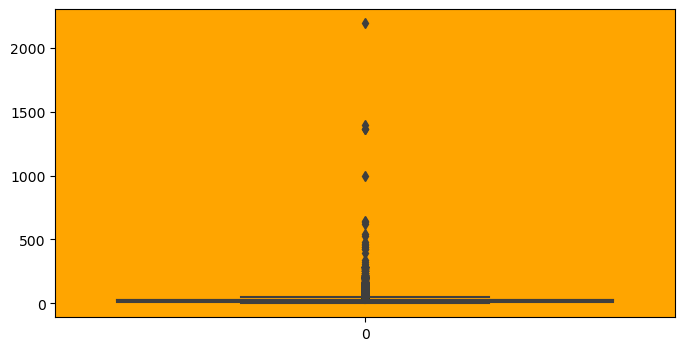

In [197]:
plt.figure(figsize=(8,4))
sns.boxplot(df['segment_osrm_distance'])
ax=plt.gca()
ax.set_facecolor('#FFA500')
plt.show()

In [198]:
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.951610,556.320988,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.921172,314.485624,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.164000,416.547252,9.072900,32.654500,70.154400,218.710200,3523.632400


# Outliers for start_scan_to_end_scan

In [199]:
q1 = np.quantile(df2['start_scan_to_end_scan'], 0.25)
q3 = np.quantile(df2['start_scan_to_end_scan'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['start_scan_to_end_scan'] < LW) | (df2['start_scan_to_end_scan'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 149.0 , 75th Percentile:-> 637.0
--------------------------------------------------
The IQR is : --> 488.0
--------------------------------------------------
The Lower wick --> -583.0
--------------------------------------------------
The Upper wick --> 1369.0
--------------------------------------------------
The Outliers present are: ->  1267


# Outliers for actual_distance_to_destination

In [200]:
q1 = np.quantile(df2['actual_distance_to_destination'], 0.25)
q3 = np.quantile(df2['actual_distance_to_destination'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['actual_distance_to_destination'] < LW) | (df2['actual_distance_to_destination'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 22.83723905859321 , 75th Percentile:-> 164.58320763841138
--------------------------------------------------
The IQR is : --> 141.74596857981817
--------------------------------------------------
The Lower wick --> -189.78171381113404
--------------------------------------------------
The Upper wick --> 377.2021605081386
--------------------------------------------------
The Outliers present are: ->  1449


# Outliers for osrm_time

In [201]:
q1 = np.quantile(df2['osrm_time'], 0.25)
q3 = np.quantile(df2['osrm_time'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['osrm_time'] < LW) | (df2['osrm_time'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 29.0 , 75th Percentile:-> 168.0
--------------------------------------------------
The IQR is : --> 139.0
--------------------------------------------------
The Lower wick --> -179.5
--------------------------------------------------
The Upper wick --> 376.5
--------------------------------------------------
The Outliers present are: ->  1517


# Outliers for osrm_distance

In [202]:
q1 = np.quantile(df2['osrm_distance'], 0.25)
q3 = np.quantile(df2['osrm_distance'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['osrm_distance'] < LW) | (df2['osrm_distance'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 30.8192 , 75th Percentile:-> 208.475
--------------------------------------------------
The IQR is : --> 177.6558
--------------------------------------------------
The Lower wick --> -235.6645
--------------------------------------------------
The Upper wick --> 474.9587
--------------------------------------------------
The Outliers present are: ->  1524


# Outliers for segment_actual_time

In [203]:
q1 = np.quantile(df2['segment_actual_time'], 0.25)
q3 = np.quantile(df2['segment_actual_time'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['segment_actual_time'] < LW) | (df2['segment_actual_time'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 66.0 , 75th Percentile:-> 367.0
--------------------------------------------------
The IQR is : --> 301.0
--------------------------------------------------
The Lower wick --> -385.5
--------------------------------------------------
The Upper wick --> 818.5
--------------------------------------------------
The Outliers present are: ->  1643


# Outliers for segment_osrm_time

In [204]:
q1 = np.quantile(df2['segment_osrm_time'], 0.25)
q3 = np.quantile(df2['segment_osrm_time'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['segment_osrm_time'] < LW) | (df2['segment_osrm_time'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 31.0 , 75th Percentile:-> 185.0
--------------------------------------------------
The IQR is : --> 154.0
--------------------------------------------------
The Lower wick --> -200.0
--------------------------------------------------
The Upper wick --> 416.0
--------------------------------------------------
The Outliers present are: ->  1492


# Outliers for segment_osrm_distance

In [205]:
q1 = np.quantile(df2['segment_osrm_distance'], 0.25)
q3 = np.quantile(df2['segment_osrm_distance'], 0.75)
print(f"25th Percentile:-> {q1} , 75th Percentile:-> {q3}")
print("-"*50)
IQR = q3 - q1
print(f"The IQR is : --> {IQR}")
print("-"*50)
LW = q1-1.5*IQR
print(f"The Lower wick --> {LW}")
print("-"*50)
UW = q3 + 1.5*IQR
print(f"The Upper wick --> {UW}")
print("-"*50)
outliers = df2.loc[(df2['segment_osrm_distance'] < LW) | (df2['segment_osrm_distance'] > UW)]
print("The Outliers present are: -> ",len(outliers))

25th Percentile:-> 32.6545 , 75th Percentile:-> 218.7102
--------------------------------------------------
The IQR is : --> 186.0557
--------------------------------------------------
The Lower wick --> -246.42905000000002
--------------------------------------------------
The Upper wick --> 497.79375
--------------------------------------------------
The Outliers present are: ->  1549


# Let's Perform one-hot encoding on categorical features 

In [206]:
df2[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894


### Featuring data columns which have the two values in it, Lets perform the Label Encoding for the following

In [208]:
df2['data'].value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le = LabelEncoder()
le

LabelEncoder()

In [211]:
df2['data_label'] = le.fit_transform(df2['data'])

In [519]:
df2["data_label"]

0        1
1        1
2        1
3        1
4        1
        ..
14812    0
14813    0
14814    0
14815    0
14816    0
Name: data_label, Length: 14817, dtype: int32

In [213]:
df2["data"].value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [214]:
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894,1
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,1740.0,2354.0665,3308.0,1941.0,2545.2678,1
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,15.0,19.6800,59.0,16.0,19.8766,1
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,117.0,146.7918,340.0,115.0,146.7919,1


### Another columns have a unqiue for the labling which is the route type for the Label Encoder

In [217]:
df2['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [219]:
labelencoder = LabelEncoder()
labelencoder

LabelEncoder()

In [222]:
df2['route_label'] =labelencoder.fit_transform(df2['route_type'])
df2['route_label']

0        1
1        0
2        1
3        0
4        1
        ..
14812    0
14813    0
14814    0
14815    0
14816    1
Name: route_label, Length: 14817, dtype: int32

In [223]:
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894,1,0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,1740.0,2354.0665,3308.0,1941.0,2545.2678,1,1
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,15.0,19.6800,59.0,16.0,19.8766,1,0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,117.0,146.7918,340.0,115.0,146.7919,1,1


# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

### Let's Analyse the Every Numerical Features from the Data Set with the Help of the MinMax scaler

In [228]:
Data = df2.copy()
Data.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894,1,0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,1740.0,2354.0665,3308.0,1941.0,2545.2678,1,1
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,15.0,19.6800,59.0,16.0,19.8766,1,0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,117.0,146.7918,340.0,115.0,146.7919,1,1


In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [243]:
Data['start_scan_to_end_scan'] = mm.fit_transform(Data['start_scan_to_end_scan'].to_numpy().reshape(-1,1))
Data['start_scan_to_end_scan'].head(2)

0    0.283937
1    0.019937
Name: start_scan_to_end_scan, dtype: float64

Normalization also known as min max scaling, basically uses the data into the scale ranges to 0 to 1.
After the normalization the data ranges between 0 to 1.
Useful when you want to scale the features to a specific range, especially if the algorithm you are using is sensitive to the scale of the variables.

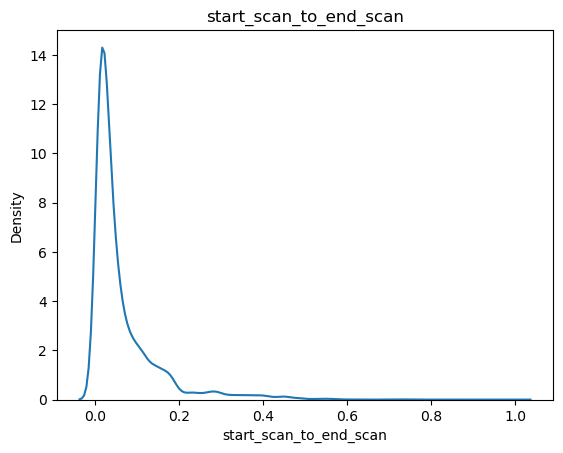

In [267]:
sns.kdeplot(Data['start_scan_to_end_scan'])
plt.title("start_scan_to_end_scan")
plt.show()

In [254]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [264]:
Data['actual_distance_to_destination'] = mm.fit_transform(Data['actual_distance_to_destination'].to_numpy().reshape(-1,1))
Data['actual_distance_to_destination'][:3]

0    0.374613
1    0.029476
2    0.880999
Name: actual_distance_to_destination, dtype: float64

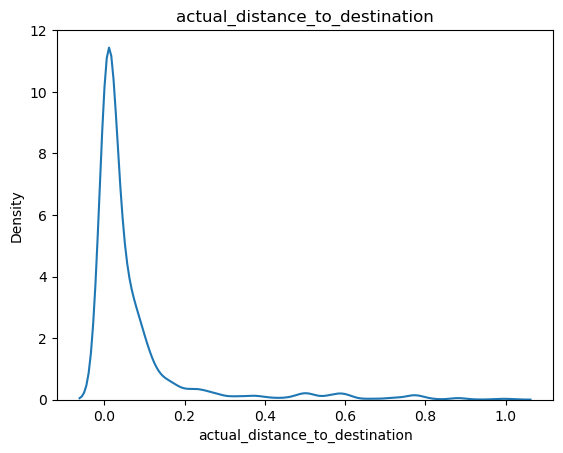

In [268]:
sns.kdeplot(Data['actual_distance_to_destination'])
plt.title("actual_distance_to_destination")
plt.show()

In [269]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [270]:
Data['osrm_time'] = mm.fit_transform(Data['osrm_time'].to_numpy().reshape(-1,1))
Data['osrm_time'][:3]

0    0.350938
1    0.030602
2    0.855874
Name: osrm_time, dtype: float64

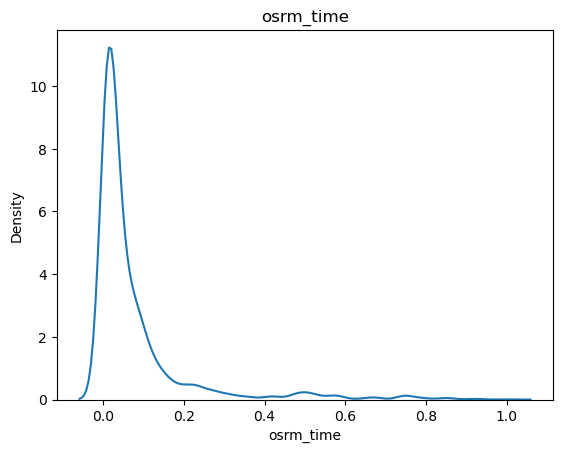

In [272]:
sns.kdeplot(Data['osrm_time'])
plt.title("osrm_time")
plt.show()

In [273]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [275]:
Data['osrm_distance'] = mm.fit_transform(Data['osrm_distance'].to_numpy().reshape(-1,1))
Data['osrm_distance'][:3]

0    0.346972
1    0.026859
2    0.828325
Name: osrm_distance, dtype: float64

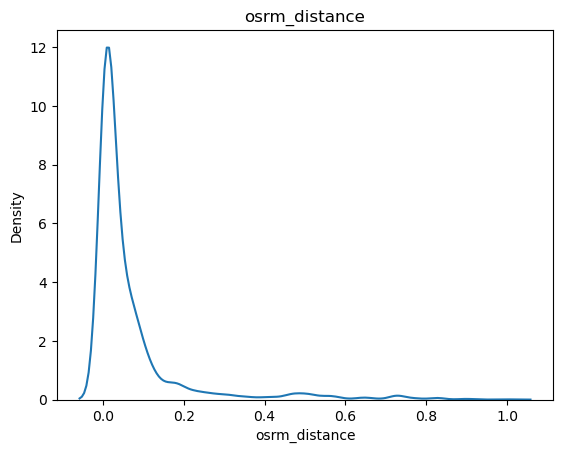

In [277]:
sns.kdeplot(Data['osrm_distance'])
plt.title("osrm_distance")
plt.show()

In [279]:
Data['segment_actual_time'] = mm.fit_transform(Data['segment_actual_time'].to_numpy().reshape(-1,1))
Data['segment_actual_time'][:3]

0    0.247388
1    0.021218
2    0.530301
Name: segment_actual_time, dtype: float64

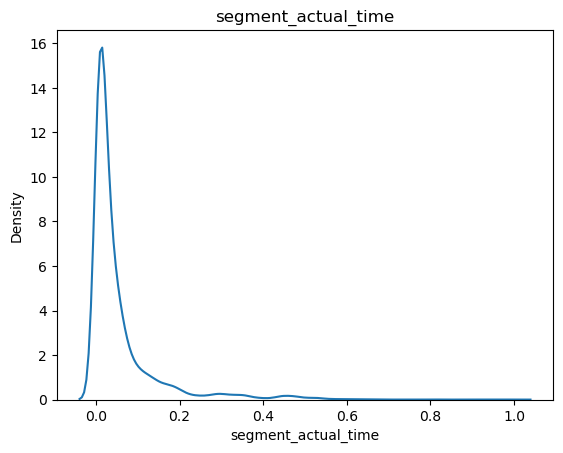

In [280]:
sns.kdeplot(Data['segment_actual_time'])
plt.title("segment_actual_time")
plt.show()

In [282]:
Data['segment_osrm_time'] = mm.fit_transform(Data['segment_osrm_time'].to_numpy().reshape(-1,1))
Data['segment_osrm_time'][:3]

0    0.391712
1    0.023065
2    0.756450
Name: segment_osrm_time, dtype: float64

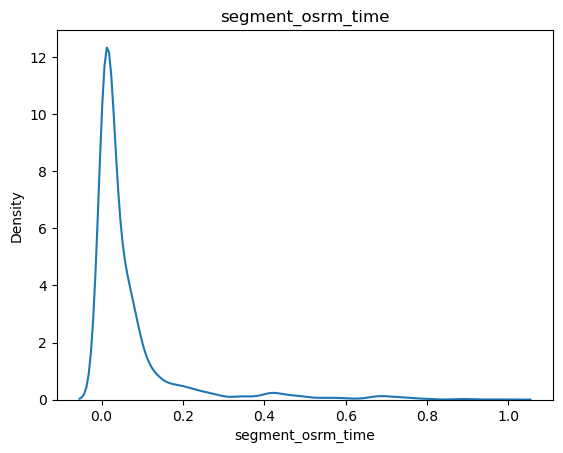

In [283]:
sns.kdeplot(Data['segment_osrm_time'])
plt.title("segment_osrm_time")
plt.show()

In [285]:
Data['segment_osrm_distance'] = mm.fit_transform(Data['segment_osrm_distance'].to_numpy().reshape(-1,1))
Data['segment_osrm_distance'][:3]

0    0.373134
1    0.021373
2    0.721625
Name: segment_osrm_distance, dtype: float64

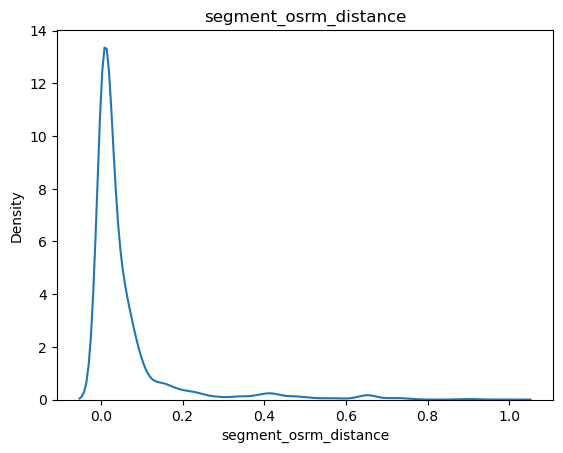

In [286]:
sns.kdeplot(Data['segment_osrm_distance'])
plt.title("segment_osrm_distance")
plt.show()

## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

### Let's Analyse the Data from the Standard Scaler Function to check the Data comes out to be in Standard Format for the rest of the Analysis

This standardization also known as the z- score normalization, it aims to transform the data into the standard normal distribution – with the mean 0 and std deviation 1

In [293]:
Sdata = df2.copy()
Sdata.head(2)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,68.0,85.1110,141.0,65.0,84.1894,1,0


In [295]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [303]:
Sdata['start_scan_to_end_scan'] = ss.fit_transform(Sdata['start_scan_to_end_scan'].to_numpy().reshape(-1,1))
Sdata[:3]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,824.732854,717.0,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,73.186911,68.0,85.1110,141.0,65.0,84.1894,1,0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),5.165134,1927.404273,1740.0,2354.0665,3308.0,1941.0,2545.2678,1,1


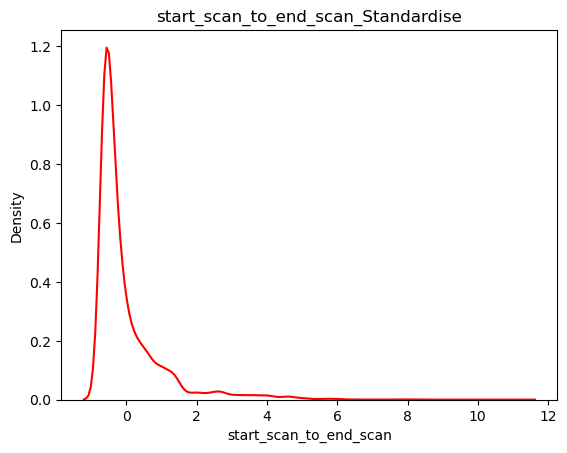

In [309]:
sns.kdeplot(Sdata['start_scan_to_end_scan'], color="red")
plt.title("start_scan_to_end_scan_Standardise")
plt.show()

In [312]:
Sdata['actual_distance_to_destination'] = ss.fit_transform(Sdata['actual_distance_to_destination'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,717.0,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,68.0,85.1110,141.0,65.0,84.1894,1,0


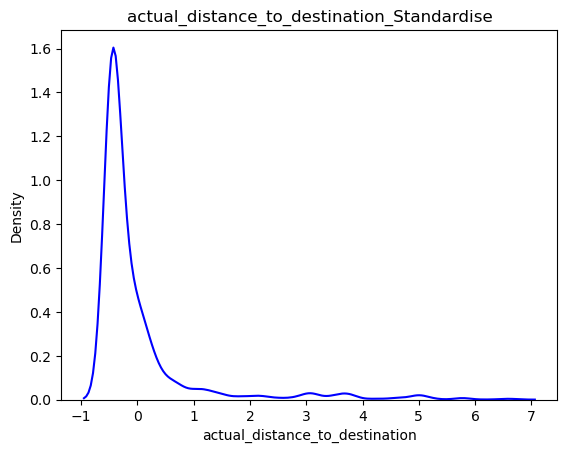

In [313]:
sns.kdeplot(Sdata['actual_distance_to_destination'], color="blue")
plt.title("actual_distance_to_destination_Standardise")
plt.show()

In [315]:
Sdata['osrm_time'] = ss.fit_transform(Sdata['osrm_time'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,2.047585,991.3523,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,-0.344144,85.1110,141.0,65.0,84.1894,1,0


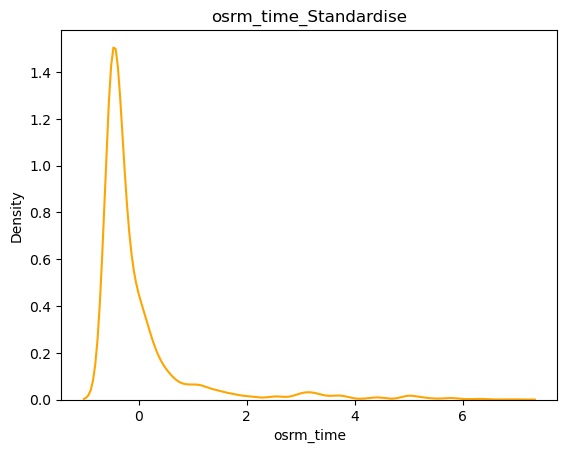

In [316]:
sns.kdeplot(Sdata['osrm_time'], color="orange")
plt.title("osrm_time_Standardise")
plt.show()

In [318]:
Sdata['osrm_distance'] = ss.fit_transform(Sdata['osrm_distance'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,2.047585,2.124848,1548.0,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,-0.344144,-0.321920,141.0,65.0,84.1894,1,0


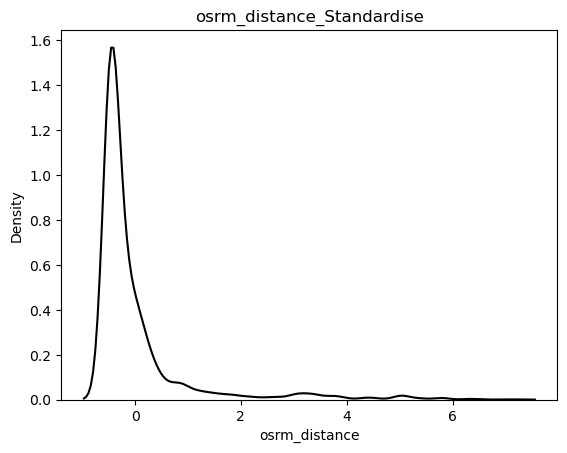

In [320]:
sns.kdeplot(Sdata['osrm_distance'], color="black")
plt.title("osrm_distance_Standardise")
plt.show()

In [322]:
Sdata['segment_actual_time'] = ss.fit_transform(Sdata['segment_actual_time'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,2.047585,2.124848,2.146402,1008.0,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,-0.344144,-0.321920,-0.382798,65.0,84.1894,1,0


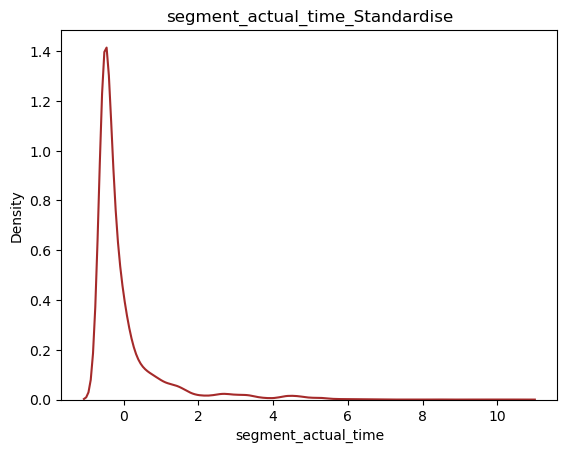

In [324]:
sns.kdeplot(Sdata['segment_actual_time'], color="brown")
plt.title("segment_actual_time_Standardise")
plt.show()

In [326]:
Sdata['segment_osrm_time'] = ss.fit_transform(Sdata['segment_osrm_time'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,2.047585,2.124848,2.146402,2.630030,1320.4733,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,-0.344144,-0.321920,-0.382798,-0.368618,84.1894,1,0


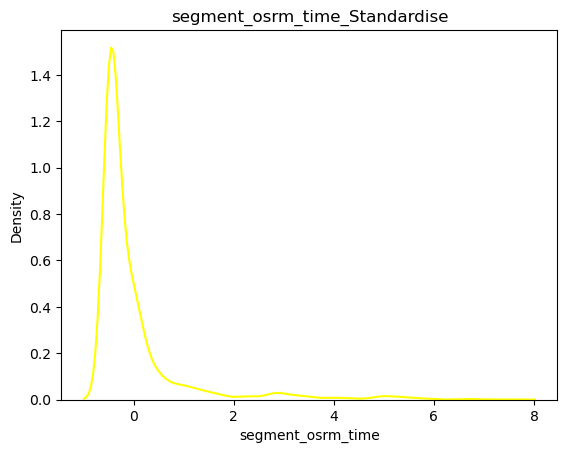

In [328]:
sns.kdeplot(Sdata['segment_osrm_time'], color="yellow")
plt.title("segment_osrm_time_Standardise")
plt.show()

In [335]:
Sdata['segment_osrm_distance'] = ss.fit_transform(Sdata['segment_osrm_distance'].to_numpy().reshape(-1,1))
Sdata[:2]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_label,route_label
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2.623702,2.162092,2.047585,2.124848,2.146402,2.630030,2.634386,1,1
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.532593,-0.298944,-0.344144,-0.321920,-0.382798,-0.368618,-0.333646,1,0


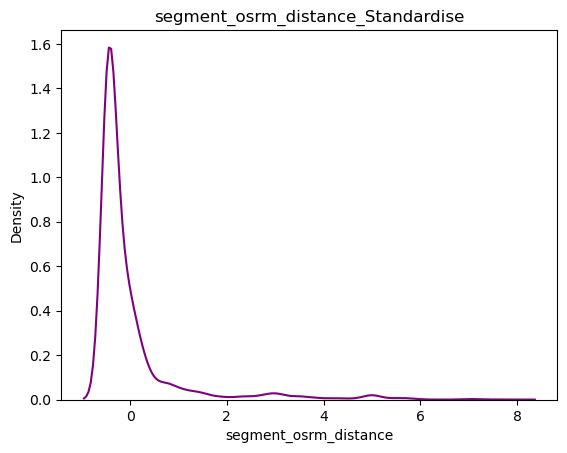

In [336]:
sns.kdeplot(Sdata['segment_osrm_distance'], color="purple")
plt.title("segment_osrm_distance_Standardise")
plt.show()

# Hypothesis Testing:

### Perform hypothesis testing / visual analysis between : actual_time aggregated value and OSRM time aggregated value.

In [345]:
df1[['actual_time','osrm_time']]

,actual_time,osrm_time
0,732.0,329.0
1,830.0,388.0
2,47.0,26.0
3,96.0,42.0
4,611.0,212.0
...,...,...
26363,51.0,41.0
26364,90.0,48.0
26365,30.0,14.0
26366,233.0,42.0


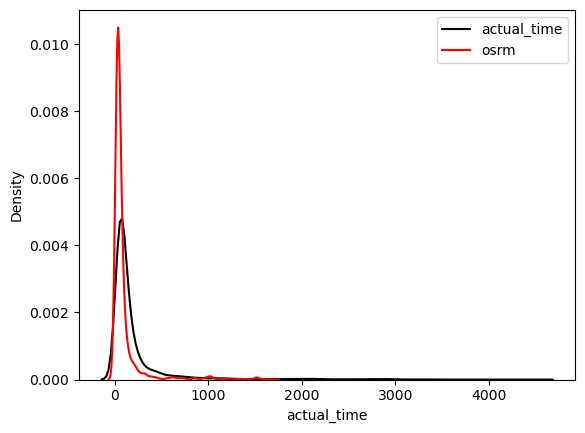

In [384]:
sns.kdeplot(df1['actual_time'], color="black", label = "actual_time")
sns.kdeplot(df1['osrm_time'], color="red",label = "osrm")
plt.legend()
plt.show()

### The Above graph does not statisfy the Normal Distribution, lets check the Data to form a Normal Distribution with the Help of the Shapiro wilk test or the Boxcox test

In [546]:
stats , pvalue = shapiro(df['actual_time'].sample(5000))
print(f"The stats value is: {stats} and the p_value comes to be {pvalue}")
alpha = 0.05
if pvalue < alpha:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

The stats value is: 0.6978424787521362 and the p_value comes to be 0.0
The sample does not follow normal distribution


### Let's Analyse with the help of the Boxcox test

In [549]:
transform_actual_time = boxcox(df['actual_time'])[0]
stats, pvalue = shapiro(transform_actual_time)
print(f"The stats value is: {stats} and the p_value comes to be {pvalue}")
alpha = 0.05
if pvalue < alpha:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

The stats value is: 0.9715785980224609 and the p_value comes to be 0.0
The sample does not follow normal distribution


In [356]:
df1['actual_time'].mean() , df1['osrm_time'].mean()

(200.690192657767, 90.68670358009709)

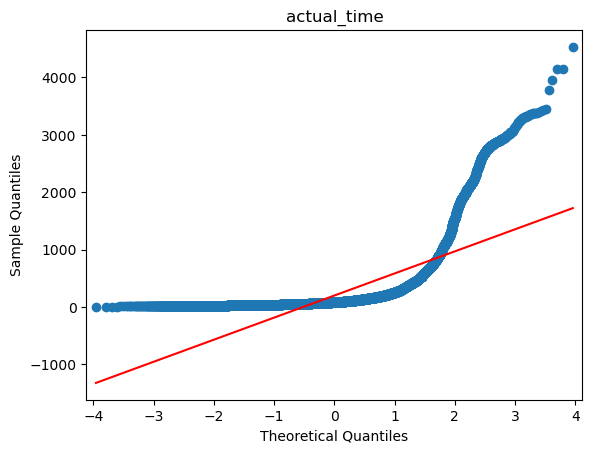

In [550]:
sm.qqplot(df1['actual_time'], line='s')
plt.title("actual_time")
plt.show()

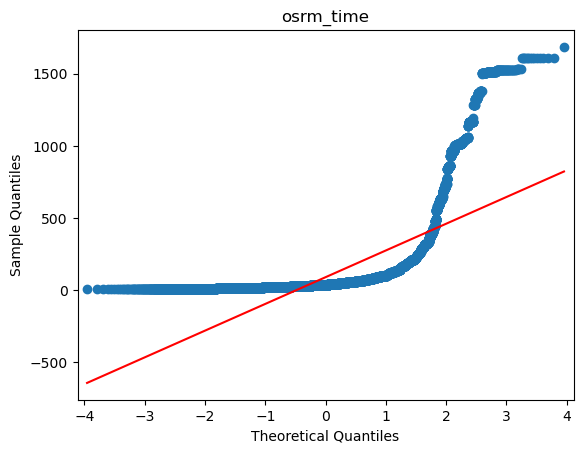

In [551]:
sm.qqplot(df1['osrm_time'], line='s')
plt.title("osrm_time")
plt.show()

In [366]:
alpha  = 0.05
statistic, pvalue = ttest_ind(df1['actual_time'], df1['osrm_time'])
print(f"The statistic value is : {statistic} and the P_value is : {pvalue}")
if pvalue < alpha:
    print(f"Reject the Null hypothesis at : {pvalue}, the values for the Both of the columns are Not same")
else:
    print(f"Failed to Reject H0 at : {pvalue}, the values are Both of the time is same")

The statistic value is : 41.82845508363711 and the P_value is : 0.0
Reject the Null hypothesis at : 0.0, the values for the Both of the columns are Not same


# Hypothesis testing Actual_time aggregated value and segment actual time aggregated value.

In [403]:
df1[['actual_time', 'segment_actual_time']]

,actual_time,segment_actual_time
0,732.0,728.0
1,830.0,820.0
2,47.0,46.0
3,96.0,95.0
4,611.0,608.0
...,...,...
26363,51.0,49.0
26364,90.0,89.0
26365,30.0,29.0
26366,233.0,233.0


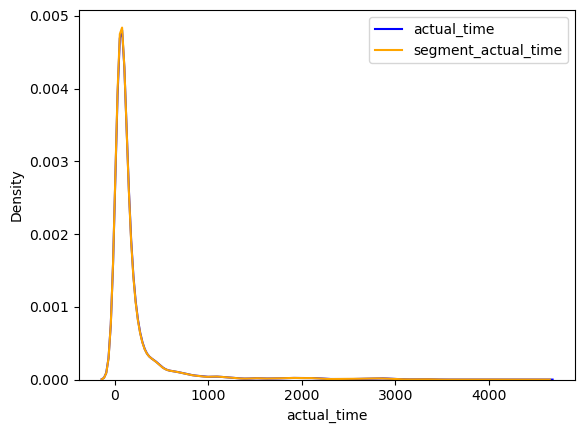

In [408]:
sns.kdeplot(df1['actual_time'], color="blue", label = "actual_time")
sns.kdeplot(df1['segment_actual_time'], color="orange",label = "segment_actual_time")
plt.legend()
plt.show()

### The Above graph does not statisfy the Normal Distribution, lets check the Data to form a Normal Distribution with the Help of the Shapiro wilk test or the Boxcox test

In [552]:
stats , pvalue = shapiro(df['segment_actual_time'].sample(5000))
print(f"The stats value is: {stats} and the p_value comes to be {pvalue}")
alpha = 0.05
if pvalue < alpha:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

The stats value is: 0.3264663815498352 and the p_value comes to be 0.0
The sample does not follow normal distribution


In [409]:
df1['actual_time'].mean(), df1['segment_actual_time'].mean()

(200.690192657767, 198.8964274878641)

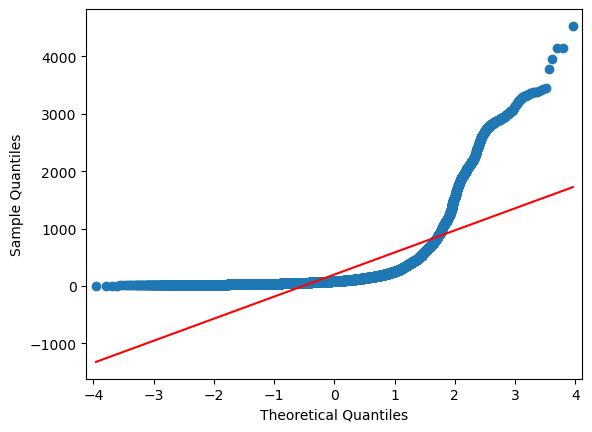

In [410]:
sm.qqplot(df1['actual_time'], line='s')
plt.show()

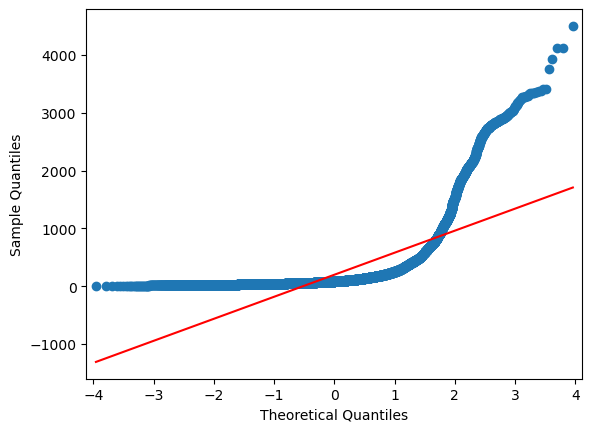

In [411]:
sm.qqplot(df1['segment_actual_time'], line='s')
plt.show()

In [414]:
alpha  = 0.05
statistic, pvalue = ttest_ind(df1['actual_time'], df1['segment_actual_time'])
print(f"The statistic value is : {statistic} and the P_value is : {pvalue}")
if pvalue < alpha:
    print(f"Reject the Null hypothesis at : {pvalue}, the values for the Both of the columns are Not same")
else:
    print(f"Failed to Reject H0 at : {pvalue}, the values are Both of the time is same")
print(" ** This Includes the Actual time and Segmented Actual time are the on the same Distributed values **")

The statistic value is : 0.5376121149549357 and the P_value is : 0.5908471331390668
Failed to Reject H0 at : 0.5908471331390668, the values are Both of the time is same
 ** This Includes the Actual time and Segmented Actual time are the on the same Distributed values **


# Hypothesis Testing between OSRM distance aggregated value and segment OSRM distance aggregated value.

In [418]:
df1[['osrm_distance', 'segment_osrm_distance']]

,osrm_distance,segment_osrm_distance
0,446.5496,670.6205
1,544.8027,649.8528
2,28.1994,28.1995
3,56.9116,55.9899
4,281.2109,317.7408
...,...,...
26363,42.5213,42.1431
26364,40.6080,78.5869
26365,16.0185,16.0184
26366,52.5303,52.5303


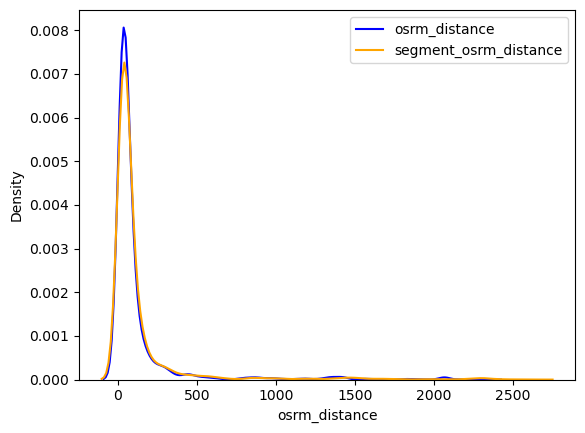

In [420]:
sns.kdeplot(df1['osrm_distance'], color="blue", label = "osrm_distance")
sns.kdeplot(df1['segment_osrm_distance'], color="orange",label = "segment_osrm_distance")
plt.legend()
plt.show()

### The Above graph does not statisfy the Normal Distribution, lets check the Data to form a Normal Distribution with the Help of the Shapiro wilk test or the Boxcox test

In [556]:
stats , pvalue = shapiro(df['osrm_time'].sample(5000))
print(f"The stats value is: {stats} and the p_value comes to be {pvalue}")
alpha = 0.05
if pvalue < alpha:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

The stats value is: 0.6909828186035156 and the p_value comes to be 0.0
The sample does not follow normal distribution


In [421]:
df1['osrm_distance'].mean(), df1['segment_osrm_distance'].mean()

(114.82764181962986, 125.40279846404732)

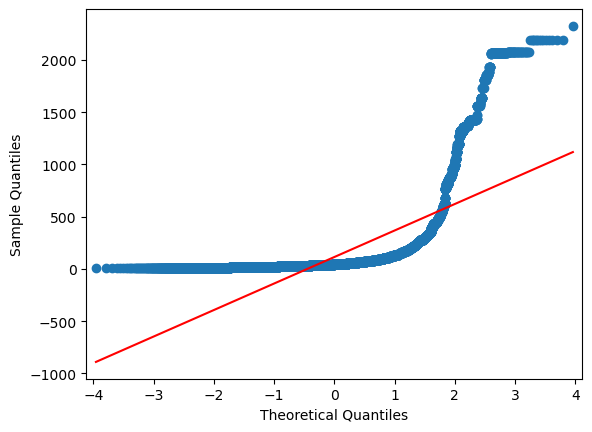

In [423]:
sm.qqplot(df1['osrm_distance'], line='s')
plt.show()

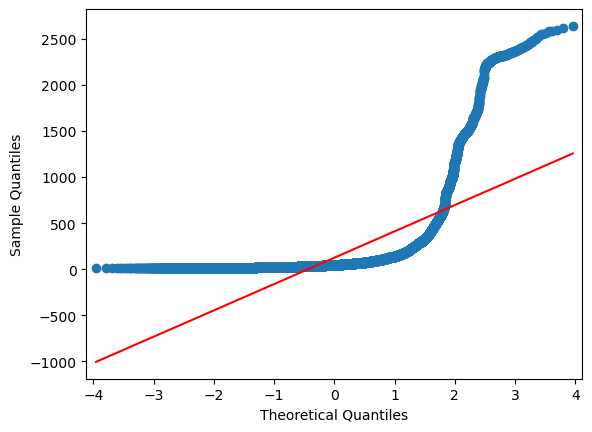

In [424]:
sm.qqplot(df1['segment_osrm_distance'], line='s')
plt.show()

In [426]:
alpha  = 0.05
statistic, pvalue = ttest_ind(df1['osrm_distance'], df1['segment_osrm_distance'])
print(f"The statistic value is : {statistic} and the P_value is : {pvalue}")
if pvalue < alpha:
    print(f"Reject the Null hypothesis at : {pvalue}, the mean values for the Both of the columns are Not same")
else:
    print(f"Failed to Reject H0 at : {pvalue}, the Mean values are Both of the time is same")
print(" ** This Includes the Osrm Distance and Segment Distance are the on the different Distributed values **")

The statistic value is : -4.4923128284182905 and the P_value is : 7.060322481862229e-06
Reject the Null hypothesis at : 7.060322481862229e-06, the mean values for the Both of the columns are Not same
 ** This Includes the Osrm Distance and Segment Distance are the on the different Distributed values **


# Hypothesis Testing for OSRM time aggregated value and segment OSRM time aggregated value.

In [428]:
df1[['osrm_time','segment_osrm_time']]

,osrm_time,segment_osrm_time
0,329.0,534.0
1,388.0,474.0
2,26.0,26.0
3,42.0,39.0
4,212.0,231.0
...,...,...
26363,41.0,42.0
26364,48.0,77.0
26365,14.0,14.0
26366,42.0,42.0


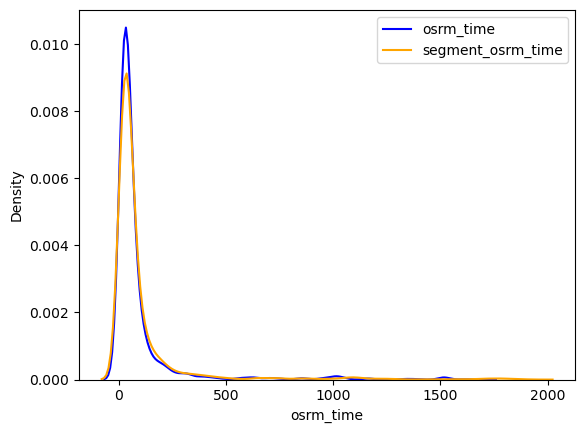

In [429]:
sns.kdeplot(df1['osrm_time'], color="blue", label = "osrm_time")
sns.kdeplot(df1['segment_osrm_time'], color="orange",label = "segment_osrm_time")
plt.legend()
plt.show()

### The Above graph does not statisfy the Normal Distribution, lets check the Data to form a Normal Distribution with the Help of the Shapiro wilk test or the Boxcox test

In [557]:
stats , pvalue = shapiro(df['segment_osrm_time'].sample(5000))
print(f"The stats value is: {stats} and the p_value comes to be {pvalue}")
alpha = 0.05
if pvalue < alpha:
    print("The sample does not follow normal distribution")
else:
    print("The sample follows normal distribution")

The stats value is: 0.7032755613327026 and the p_value comes to be 0.0
The sample does not follow normal distribution


In [433]:
df1['osrm_time'].mean(), df1['segment_osrm_time'].mean()

(90.68670358009709, 101.66523816747574)

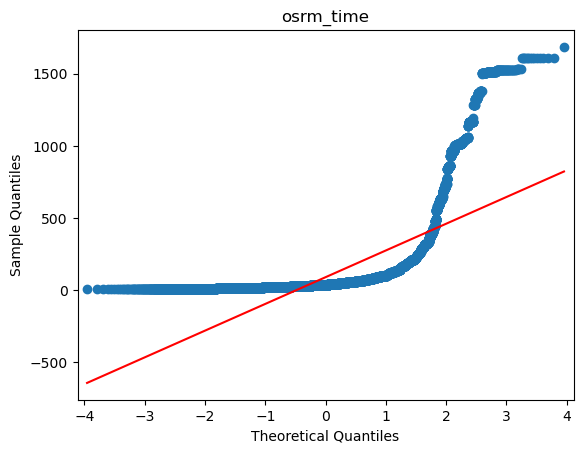

In [436]:
sm.qqplot(df1['osrm_time'], line='s')
plt.title("osrm_time")
plt.show()

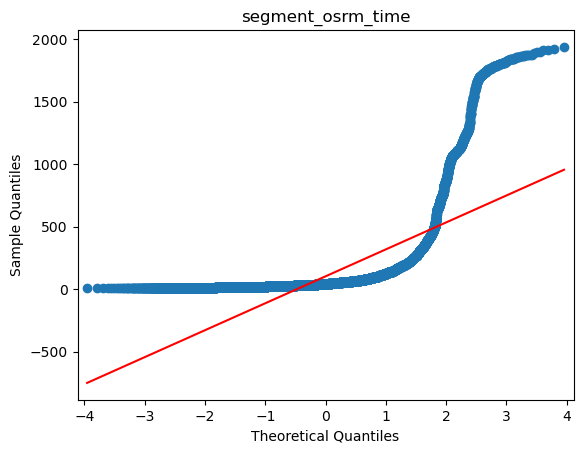

In [437]:
sm.qqplot(df1['segment_osrm_time'], line='s')
plt.title("segment_osrm_time")
plt.show()

In [438]:
alpha  = 0.05
statistic, pvalue = ttest_ind(df1['osrm_time'], df1['segment_osrm_time'])
print(f"The statistic value is : {statistic} and the P_value is : {pvalue}")
if pvalue < alpha:
    print(f"Reject the Null hypothesis at : {pvalue}, the mean values for the Both of the columns are Not same")
else:
    print(f"Failed to Reject H0 at : {pvalue}, the Mean values are Both of the is same and lies on the same page")
print(" ** This Includes the Osrm time and Segment osrm time are the on the different Distributed values **")

The statistic value is : -6.273924701299134 and the P_value is : 3.547839442615796e-10
Reject the Null hypothesis at : 3.547839442615796e-10, the mean values for the Both of the columns are Not same
 ** This Includes the Osrm time and Segment osrm time are the on the different Distributed values **
